In [35]:
import pandas as pd
from patsy import dmatrices
import statsmodels.api as sm
#import statsmodels.tsa.api as sm
#注意这两者的区别

vars = ['Department', 'Lottery', 'Literacy', 'Wealth', 'Region']
df = pd.read_csv('data/guerry.csv')
df = df[vars]
df.dropna()
df.tail()

,Department,Lottery,Literacy,Wealth,Region
81,Vienne,40,25,68,W
82,Haute-Vienne,55,13,67,C
83,Vosges,14,62,82,E
84,Yonne,51,47,30,C
85,Corse,83,49,37,


### pasty整理数据
patsy是python中的描述性统计库

https://patsy.readthedocs.io/en/latest/

pasty功能:
- 将Region分类变量dummy化
- 给回归方程右侧的矩阵加入了常数项
- 返回的X,y都是dataframe数据类型


这简化了statsmodels的OLS过程

In [36]:
y, X = dmatrices('Lottery ~ Literacy + Wealth + Region', data=df, return_type='dataframe')
y.head()

,Lottery
0,41.0
1,38.0
2,66.0
3,80.0
4,79.0


In [37]:
X.head()

,Intercept,Region[T.C],Region[T.E],Region[T.N],Region[T.S],Region[T.W],Literacy,Wealth
0,1.0,0.0,1.0,0.0,0.0,0.0,37.0,73.0
1,1.0,0.0,0.0,1.0,0.0,0.0,51.0,22.0
2,1.0,1.0,0.0,0.0,0.0,0.0,13.0,61.0
3,1.0,0.0,1.0,0.0,0.0,0.0,46.0,76.0
4,1.0,0.0,1.0,0.0,0.0,0.0,69.0,83.0


### OLS

In [34]:
model = sm.OLS(y, X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     6.205
Date:                Thu, 19 Dec 2019   Prob (F-statistic):           8.69e-06
Time:                        14:12:44   Log-Likelihood:                -379.21
No. Observations:                  86   AIC:                             774.4
Df Residuals:                      78   BIC:                             794.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      75.4006     23.971      3.145      

### model的参数
- res.params  OLS各个变量的系数
- res.pvalues  OLS各个变量的p值
- res.rsquared OLS模型的R方

In [40]:
res.params

Intercept      75.400576
Region[T.C]   -36.748921
Region[T.E]   -52.176706
Region[T.N]   -46.765882
Region[T.S]   -41.297178
Region[T.W]   -46.840197
Literacy       -0.185819
Wealth          0.451475
dtype: float64

In [42]:
res.pvalues

Intercept      0.002347
Region[T.C]    0.099065
Region[T.E]    0.018206
Region[T.N]    0.033076
Region[T.S]    0.061639
Region[T.W]    0.035906
Literacy       0.378495
Wealth         0.000035
dtype: float64

In [43]:
res.rsquared

0.3576709437680746

### 模型检验

In [44]:
sm.stats.linear_rainbow(res)

(0.8040648600983513, 0.7546709285647615)

In [46]:
print(sm.stats.linear_rainbow.__doc__)

Rainbow test for linearity

    The Null hypothesis is that the regression is correctly modelled as linear.
    The alternative for which the power might be large are convex, check

    Parameters
    ----------
    res : Result instance

    Returns
    -------
    fstat : float
        test statistic based of F test
    pvalue : float
        pvalue of the test

    


### 作图

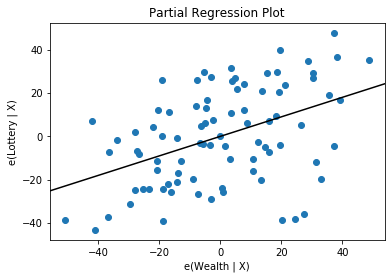

In [62]:
import matplotlib.pyplot as plt
sm.graphics.plot_partregress('Lottery', 'Wealth',['Region', 'Literacy'],
                             data=df, obs_labels=False)
plt.show()

In [53]:
help(sm.graphics.plot_partregress)

Help on function plot_partregress in module statsmodels.graphics.regressionplots:

plot_partregress(endog, exog_i, exog_others, data=None, title_kwargs={}, obs_labels=True, label_kwargs={}, ax=None, ret_coords=False, **kwargs)
    Plot partial regression for a single regressor.
    
    Parameters
    ----------
    endog : ndarray or string
       endogenous or response variable. If string is given, you can use a
       arbitrary translations as with a formula.
    exog_i : ndarray or string
        exogenous, explanatory variable. If string is given, you can use a
        arbitrary translations as with a formula.
    exog_others : ndarray or list of strings
        other exogenous, explanatory variables. If a list of strings is given,
        each item is a term in formula. You can use a arbitrary translations
        as with a formula. The effect of these variables will be removed by
        OLS regression.
    data : DataFrame, dict, or recarray
        Some kind of data structure 

In [64]:
sm.webdoc('ols')

In [65]:
sm.webdoc(sm.OLS, stable=False)